# Đồ án 3: Fake news detection

### 1. Đọc tập dữ liệu

Thư viện

In [1]:
import pandas as pd 
import re

#!pip install underthesea
from underthesea import sent_tokenize
from underthesea import classify
from underthesea import word_tokenize

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, 
                      # giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(display='diagram')

#### Sử dụng Underthesea - Vietnamese NLP Toolkit

#### 1.1. Bộ dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
pd.set_option("max_colwidth", 140)

res = pd.read_csv("vn_news_223_tdlfr.csv" , sep =',',encoding = 'utf-8')
vnnews_df = pd.DataFrame(data=res)
vnnews_df.head(10)

,text,domain,label
0,"Thủ tướng Abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển Nhật\nTheo Sankei Sports, sáng nay Thủ tướng Nhật Bản Shinzo Abe công ...",binhluan.biz,1
1,"Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng\nSáng 19/6, Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗ...",www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường!!!\nXót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở Nghệ An\...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\nGiáo sư Nguyễn Lân Dũng: ‘Con tôi thành đạt nhờ cách đánh vần ‘ô vuông tam giác’\nGS.Nguyễ...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt"" vào năm học 2018?\nMới đây, ông Phạm Ngọc Thanh, Phó giám đốc Sở GD – ĐT Tp. Hồ Chí Minh ...",www.gioitreviet.net,1
5,"Cười vỡ bụng khi tiếng CẢI CÁCH ""vuông tròn"" xâm nhập chợ búa, các mẹ sử dụng chuyên nghiệp\nNhững ngày qua, các phụ huynh liên tục chia...",giadinhtiepthi.com,1
6,"Chia sẻ thẳng thắn vụ việc 25000 USD và cải cách giáo dục, rốt cục là “sân si” hay là “ganh tị”\nNhững ngày qua, trên mạng xã hội các ph...",giadinhtiepthi.com,1
7,Hại não với Vọng Cổ mang tên Vuông Tròn Tam Giác!\nChương trình công nghệ giáo dục: Hãy tôn trọng sự khác biệt !\nTrong “cơn bão” tranh ...,tintucqpvn.net,1
8,"Kinh hoàng bé gái bị chó nhà tấn công, cắn vào khắp người gây phẫn nộ\n“Sẽ cấm tiệt, không cho mang chó vào phố đi bộ hồ Gươm”\n“Chúng t...",tintucqpvn.net,1
9,"Bức vẽ giúp bạn đánh giá mức độ stress của bản thân\nNhìn bức tranh, bạn có thể thấy vòng tròn đang chuyển động một cách chậm rãi. Người...",suckhoe.vnexpress.net,1


In [4]:
num_rows = vnnews_df.shape[0]
num_cols = vnnews_df.shape[1]
print(num_rows, num_cols)

223 3


#### Bộ dữ liệu có 223 dòng và 3 cột

#### 1.2 Dữ liệu có bị trùng lắp không?

In [5]:
count_duplicated = vnnews_df.duplicated(keep = False).sum()
print(count_duplicated)

2


Như vậy, có 2 dòng dữ liệu bị trùng. Ta sẽ xóa đi dữ liệu bị trùng

In [6]:
# pd.set_option("max_colwidth", 140)
vnnews_df = vnnews_df.drop_duplicates()
vnnews_df

,text,domain,label
0,"Thủ tướng Abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển Nhật\nTheo Sankei Sports, sáng nay Thủ tướng Nhật Bản Shinzo Abe công ...",binhluan.biz,1
1,"Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng\nSáng 19/6, Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗ...",www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường!!!\nXót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở Nghệ An\...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\nGiáo sư Nguyễn Lân Dũng: ‘Con tôi thành đạt nhờ cách đánh vần ‘ô vuông tam giác’\nGS.Nguyễ...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt"" vào năm học 2018?\nMới đây, ông Phạm Ngọc Thanh, Phó giám đốc Sở GD – ĐT Tp. Hồ Chí Minh ...",www.gioitreviet.net,1
...,...,...,...
218,"“Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Malaysia cổ vũ chung kết lượt đi\n""Siêu máy bay"" A350-900 của Vietnam Airlines sẽ chở CĐV Việ...",dantri.com.vn,0
219,"Thưởng 20.000 USD cho đội tuyển cờ vua Việt Nam tại Olympiad 2018\nMột lần nữa, Cờ vua Việt Nam lại khẳng định đẳng cấp trên đấu trường ...",dantri.com.vn,0
220,Trường Sơn giành HCV tại giải cờ vua đồng đội thế giới 2018\nHạng 7 chung cuộc cũng là hạng cao nhất của cờ vua Việt Nam tại các kỳ Olym...,dantri.com.vn,0
221,"Chuyện về chàng sinh viên Luật - Kiện tướng Lê Tuấn Minh\nHôm nay, chúng tôi liên lạc vào số máy của Lê Tuấn Minh thì mẹ cậu bắt máy. Hỏ...",dantri.com.vn,0


#### 1.3. Kiểu dữ liệu

In [7]:
vnnews_df.dtypes

text      object
domain    object
label      int64
dtype: object

Ta chuyển cột `text` và `domain` sang kiểu string

In [8]:
vnnews_df['text'] = vnnews_df['text'].astype(str)
vnnews_df['domain'] = vnnews_df['domain'].astype(str)

### 2. Tiền xử lý văn bản

In [9]:
vnnews_df.head(3)

,text,domain,label
0,"Thủ tướng Abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển Nhật\nTheo Sankei Sports, sáng nay Thủ tướng Nhật Bản Shinzo Abe công ...",binhluan.biz,1
1,"Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng\nSáng 19/6, Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗ...",www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường!!!\nXót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở Nghệ An\...,tintucqpvn.net,1


Trong những mẫu tin còn chứa ký tự xuống dòng "\n"

#### 2.1. Loại bỏ ký tự xuống dòng "\n", thay thế bằng dấu chấm "."

In [10]:
def remove_trailing_newline(x):
    return x.replace("\n", ". ")
vnnews_df['text'] = vnnews_df['text'].apply(remove_trailing_newline)
vnnews_df

,text,domain,label
0,"Thủ tướng Abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển Nhật. Theo Sankei Sports, sáng nay Thủ tướng Nhật Bản Shinzo Abe công ...",binhluan.biz,1
1,"Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng. Sáng 19/6, Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗ...",www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường!!!. Xót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở Nghệ An....,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!. Giáo sư Nguyễn Lân Dũng: ‘Con tôi thành đạt nhờ cách đánh vần ‘ô vuông tam giác’. GS.Nguyễ...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt"" vào năm học 2018?. Mới đây, ông Phạm Ngọc Thanh, Phó giám đốc Sở GD – ĐT Tp. Hồ Chí Minh ...",www.gioitreviet.net,1
...,...,...,...
218,"“Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Malaysia cổ vũ chung kết lượt đi. ""Siêu máy bay"" A350-900 của Vietnam Airlines sẽ chở CĐV Việ...",dantri.com.vn,0
219,"Thưởng 20.000 USD cho đội tuyển cờ vua Việt Nam tại Olympiad 2018. Một lần nữa, Cờ vua Việt Nam lại khẳng định đẳng cấp trên đấu trường ...",dantri.com.vn,0
220,Trường Sơn giành HCV tại giải cờ vua đồng đội thế giới 2018. Hạng 7 chung cuộc cũng là hạng cao nhất của cờ vua Việt Nam tại các kỳ Olym...,dantri.com.vn,0
221,"Chuyện về chàng sinh viên Luật - Kiện tướng Lê Tuấn Minh. Hôm nay, chúng tôi liên lạc vào số máy của Lê Tuấn Minh thì mẹ cậu bắt máy. Hỏ...",dantri.com.vn,0


#### 2.2. Classify 

Một dòng dữ liệu là một mẫu tin. Ta sẽ tìm hiểu xem mẫu tin đó thuộc về lĩnh vực nào

In [11]:
def fieldify(text):
    return ' '.join(classify(text))
field_df = vnnews_df['text'].apply(fieldify)

Thêm cột `field` vào dataframes

In [12]:
vnnews_df['field']= field_df
vnnews_df

,text,domain,label,field
0,"Thủ tướng Abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển Nhật. Theo Sankei Sports, sáng nay Thủ tướng Nhật Bản Shinzo Abe công ...",binhluan.biz,1,the_thao
1,"Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng. Sáng 19/6, Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗ...",www.ipick.vn,1,the_thao
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường!!!. Xót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở Nghệ An....,tintucqpvn.net,1,chinh_tri_xa_hoi
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!. Giáo sư Nguyễn Lân Dũng: ‘Con tôi thành đạt nhờ cách đánh vần ‘ô vuông tam giác’. GS.Nguyễ...,tintucqpvn.net,1,chinh_tri_xa_hoi
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt"" vào năm học 2018?. Mới đây, ông Phạm Ngọc Thanh, Phó giám đốc Sở GD – ĐT Tp. Hồ Chí Minh ...",www.gioitreviet.net,1,chinh_tri_xa_hoi
...,...,...,...,...
218,"“Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Malaysia cổ vũ chung kết lượt đi. ""Siêu máy bay"" A350-900 của Vietnam Airlines sẽ chở CĐV Việ...",dantri.com.vn,0,chinh_tri_xa_hoi
219,"Thưởng 20.000 USD cho đội tuyển cờ vua Việt Nam tại Olympiad 2018. Một lần nữa, Cờ vua Việt Nam lại khẳng định đẳng cấp trên đấu trường ...",dantri.com.vn,0,the_thao
220,Trường Sơn giành HCV tại giải cờ vua đồng đội thế giới 2018. Hạng 7 chung cuộc cũng là hạng cao nhất của cờ vua Việt Nam tại các kỳ Olym...,dantri.com.vn,0,the_thao
221,"Chuyện về chàng sinh viên Luật - Kiện tướng Lê Tuấn Minh. Hôm nay, chúng tôi liên lạc vào số máy của Lê Tuấn Minh thì mẹ cậu bắt máy. Hỏ...",dantri.com.vn,0,the_thao


Có 10 lĩnh vực trong bộ dữ liệu:

In [13]:
vnnews_df['field'].unique()

array(['the_thao', 'chinh_tri_xa_hoi', 'van_hoa', 'khoa_hoc', 'suc_khoe',
       'phap_luat', 'kinh_doanh', 'doi_song', 'vi_tinh', 'the_gioi'],
      dtype=object)

Trong đó:
- the_thao: Thể thao
- chinh_tri_xa_hoi:  Chính trị Xã hội
- van_hoa: Văn hóa
- khoa_hoc: Khoa học
- suc_khoe: Sức khỏe
- phap_luat: Pháp luật
- kinh_doanh: Kinh doanh
- doi_song: Đời sống
- vi_tinh: Vi tính
- the_gioi: Thế giới

#### 2.3. Tách câu 

Với mỗi mẫu tin, ta sẽ tách riêng từng câu để dễ xử lý

In [14]:
def sentencing(text):
    return sent_tokenize(text)
vnnews_df['text'] = vnnews_df['text'].apply(sentencing)

In [15]:
pd.set_option("max_colwidth", 200)
vnnews_df.head(5)

,text,domain,label,field
0,"[Thủ tướng Abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển Nhật., Theo Sankei Sports, sáng nay Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗi tới Nhật hoàng và toàn bộ người dân v...",binhluan.biz,1,the_thao
1,"[Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng., Sáng 19/6, Thủ tướng Nhật Bản Shinzo Abe công khai gửi lời xin lỗi tới Nhật hoàng và toàn bộ người dân vì tinh thần thi đấu...",www.ipick.vn,1,the_thao
2,"[Choáng!, Cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường!!!., Xót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở Nghệ An., Sau lũ, nhiều học sinh vùng cao và giáo viên ở Nghệ An ...",tintucqpvn.net,1,chinh_tri_xa_hoi
3,"[Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!., Giáo sư Nguyễn Lân Dũng: ‘Con tôi thành đạt nhờ cách đánh vần ‘ô vuông tam giác’., GS.Nguyễn Lân Dũng khẳng định: Con ông, PGS.TS Nguyễn Lân Hiếu th...",tintucqpvn.net,1,chinh_tri_xa_hoi
4,"[Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt"" vào năm học 2018?., Mới đây, ông Phạm Ngọc Thanh, Phó giám đốc Sở GD – ĐT Tp. Hồ Chí Minh chuyên trách về Hệ giáo dục Đại học tại thành phố đã lên t...",www.gioitreviet.net,1,chinh_tri_xa_hoi


#### 2.4. Loại bỏ dấu câu và khoảng trắng

In [16]:
def clean_sentence(sentences):
    res = []
    for sentence in sentences:
        sentence = sentence.lower()
        # Loại khoảng trắng
        sentence = re.sub('\n|\r|\t', '', sentence)   
        # Loại bỏ dấu câu
        sentence = re.sub(r'[^\w\s]+', '', sentence) 
        res.append(sentence)
    return res

In [17]:
vnnews_df['text'] = vnnews_df['text'].apply(clean_sentence)
vnnews_df.head(5)

,text,domain,label,field
0,"[thủ tướng abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển nhật, theo sankei sports sáng nay thủ tướng nhật bản shinzo abe công khai gửi lời xin lỗi tới nhật hoàng và toàn bộ người dân vì ...",binhluan.biz,1,the_thao
1,"[thủ tướng nhật cúi đầu xin lỗi vì tinh thần phi thể thao của đội bóng, sáng 196 thủ tướng nhật bản shinzo abe công khai gửi lời xin lỗi tới nhật hoàng và toàn bộ người dân vì tinh thần thi đấu ph...",www.ipick.vn,1,the_thao
2,"[choáng, cơ trưởng đeo khăn quàng quẩy banh nóc trên sân khấu trường, xót xa hình ảnh thầy trò lội bùn băng rừng đến trường ở nghệ an, sau lũ nhiều học sinh vùng cao và giáo viên ở nghệ an phải đố...",tintucqpvn.net,1,chinh_tri_xa_hoi
3,"[chưa bao giờ nhạc kpop lại dễ hát đến thế, giáo sư nguyễn lân dũng con tôi thành đạt nhờ cách đánh vần ô vuông tam giác, gsnguyễn lân dũng khẳng định con ông pgsts nguyễn lân hiếu thành công nhờ ...",tintucqpvn.net,1,chinh_tri_xa_hoi
4,"[đại học hutech sẽ áp dụng cải cách tiếq việt vào năm học 2018, mới đây ông phạm ngọc thanh phó giám đốc sở gd đt tp hồ chí minh chuyên trách về hệ giáo dục đại học tại thành phố đã lên tiếng về ...",www.gioitreviet.net,1,chinh_tri_xa_hoi


#### 2.5. Tokenize

Trước khi sang bước loại bỏ stopword, cần tokenize để tránh loại đi những từ cần thiết

In [18]:
def tokenize_sent(sentences):
    res = [[]]
    for sentence in sentences:
        sentence = word_tokenize(sentence)
        res.append(sentence)
    return res

In [19]:
vnnews_df['text'] = vnnews_df['text'].apply(tokenize_sent)

In [20]:
vnnews_df

,text,domain,label,field
0,"[[], [thủ tướng, abe, cúi, đầu, xin lỗi, vì, hành động, phi, thể thao, của, tuyển, nhật], [theo, sankei, sports, sáng, nay, thủ tướng, nhật, bản, shinzo, abe, công khai, gửi, lời, xin lỗi, tới, nh...",binhluan.biz,1,the_thao
1,"[[], [thủ tướng, nhật, cúi, đầu, xin lỗi, vì, tinh thần, phi, thể thao, của, đội, bóng], [sáng, 196, thủ tướng, nhật, bản, shinzo, abe, công khai, gửi, lời, xin lỗi, tới, nhật, hoàng, và, toàn bộ,...",www.ipick.vn,1,the_thao
2,"[[], [choáng], [cơ, trưởng, đeo, khăn quàng, quẩy, banh, nóc, trên, sân khấu, trường], [xót xa, hình ảnh, thầy trò, lội, bùn, băng, rừng, đến, trường, ở, nghệ, an], [sau, lũ, nhiều, học sinh, vùng...",tintucqpvn.net,1,chinh_tri_xa_hoi
3,"[[], [chưa, bao giờ, nhạc, kpop, lại, dễ, hát, đến, thế], [giáo sư, nguyễn lân, dũng, con, tôi, thành đạt, nhờ, cách, đánh vần, ô vuông, tam giác], [gsnguyễn, lân, dũng, khẳng định, con, ông, pgst...",tintucqpvn.net,1,chinh_tri_xa_hoi
4,"[[], [đại học, hutech, sẽ, áp dụng, cải cách, tiếq, việt, vào, năm học, 2018], [mới, đây, ông, phạm, ngọc, thanh, phó, giám đốc, sở, gd, đt, tp, hồ, chí minh, chuyên trách, về, hệ, giáo dục, đại h...",www.gioitreviet.net,1,chinh_tri_xa_hoi
...,...,...,...,...
218,"[[], [siêu, máy bay, a350, sẽ, chở, cđv, việt, nam, đi, malaysia, cổ vũ, chung kết, lượt, đi], [siêu, máy bay, a350900, của, vietnam, airlines, sẽ, chở, cđv, việt, nam, đi, malaysia, cổ vũ, đội tu...",dantri.com.vn,0,chinh_tri_xa_hoi
219,"[[], [thưởng, 20000, usd, cho, đội tuyển, cờ vua, việt, nam, tại, olympiad, 2018], [một, lần, nữa, cờ vua, việt, nam, lại, khẳng định, đẳng cấp, trên, đấu trường, quốc tế], [tại, lễ, vinh danh, độ...",dantri.com.vn,0,the_thao
220,"[[], [trường sơn, giành, hcv, tại, giải, cờ vua, đồng đội, thế giới, 2018], [hạng, 7, chung cuộc, cũng, là, hạng, cao, nhất, của, cờ vua, việt, nam, tại, các, kỳ, olympiad, từ, trước, đến, nay, ng...",dantri.com.vn,0,the_thao
221,"[[], [chuyện, về, chàng, sinh viên, luật, kiện tướng, lê tuấn, minh], [hôm nay, chúng tôi, liên lạc, vào, số, máy, của, lê, tuấn, minh, thì, mẹ, cậu, bắt, máy], [hỏi, xin, được, nói chuyện, với, l...",dantri.com.vn,0,the_thao


#### 2.6. Loại bỏ stopword

Tạo list những stopwords tiếng Việt

In [21]:
with open('stopwords.txt', 'r', encoding="utf-8") as f:
    stopwords = f.readlines()
    stop_set = set(m.strip() for m in stopwords)
    stopwords =  list(frozenset(stop_set))

Hàm loại bỏ stopwords

In [22]:
def remove_stopwords(word_list):
    for el in word_list:
        if len(el)==0:
            word_list.remove(el)
            continue
        for sw in stopwords:
            if sw in el:
                el.remove(sw)
    return word_list

In [23]:
vnnews_df['text'] = vnnews_df['text'].apply(remove_stopwords)
pd.set_option("max_colwidth", 300)
vnnews_df

,text,domain,label,field
0,"[[thủ tướng, abe, cúi, đầu, xin lỗi, vì, hành động, phi, thể thao, của, tuyển, nhật], [sankei, sports, thủ tướng, nhật, shinzo, abe, công khai, gửi, xin lỗi, nhật, hoàng, toàn bộ, dân, tinh thần, thi đấu, phi, thể thao, đội tuyển, nhật, world, cup, 2018, tối qua, lượt, trận, vòng, bảng, world, c...",binhluan.biz,1,the_thao
1,"[[thủ tướng, nhật, cúi, đầu, xin lỗi, vì, tinh thần, phi, thể thao, của, đội, bóng], [196, thủ tướng, nhật, shinzo, abe, công khai, gửi, xin lỗi, nhật, hoàng, toàn bộ, dân, tinh thần, thi đấu, phi, thể thao, đội tuyển, nhật, world, cup, 2018, tinh thần, của, võ sĩ đạo, samurai, đội tuyển, nhật, ...",www.ipick.vn,1,the_thao
2,"[[choáng], [trưởng, đeo, khăn quàng, quẩy, banh, sân khấu, trường], [xót xa, hình ảnh, thầy trò, lội, bùn, băng, rừng, trường, nghệ, an], [lũ, học sinh, vùng cao, giáo viên, nghệ an, đối mặt, thiếu thốn, giao thông, chia cắt, cơ sở vật chất, bị, lũ, trôi, hình ảnh, học sinh, và, giáo viên, ở, ng...",tintucqpvn.net,1,chinh_tri_xa_hoi
3,"[[chưa, bao giờ, nhạc, kpop, lại, dễ, hát, đến, thế], [giáo sư, nguyễn lân, dũng, thành đạt, đánh vần, ô vuông, tam giác], [gsnguyễn, lân, dũng, pgsts, nguyễn lân, hiếu, thành công, phương pháp học, tiếng, việt, gs, hồ, ngọc, đại, mấy, ngày nay, cộng đồng, mạng, sục sôi, thông tin, phụ huynh, nổ...",tintucqpvn.net,1,chinh_tri_xa_hoi
4,"[[đại học, hutech, sẽ, áp dụng, cải cách, tiếq, việt, vào, năm học, 2018], [phạm, ngọc, phó, giám đốc, sở, gd, đt, tp, hồ, chí minh, chuyên trách, hệ, giáo dục, đại học, thành phố, lên tiếng, về, cải cách, tiếng, tiếng, việt, pgsts, bùi, hiền, ông, tphcm, đề xuất, của, pgs, sẵn lòng, thí điểm, g...",www.gioitreviet.net,1,chinh_tri_xa_hoi
...,...,...,...,...
218,"[[siêu, máy bay, a350, sẽ, chở, cđv, việt, nam, đi, malaysia, cổ vũ, chung kết, lượt, đi], [siêu, máy bay, a350900, vietnam, airlines, chở, cđv, việt, nam, đi, malaysia, cổ vũ, đội tuyển, quốc gia, đá, trận, chung kết, lượt, đi], [vietnam, airlines, 6, chuyến, bay, tăng cường, đi, kuala, lumpur,...",dantri.com.vn,0,chinh_tri_xa_hoi
219,"[[thưởng, 20000, usd, cho, đội tuyển, cờ vua, việt, nam, tại, olympiad, 2018], [cờ vua, việt, nam, đẳng cấp, đấu trường, quốc tế], [lễ, vinh danh, đội tuyển, cờ vua, việt, nam, 1310, nam, a, bank, thưởng, 20000, usd, ghi nhận, thành công, đội tuyển, giải, cờ vua, đồng đội, thế giới, olypiad, 201...",dantri.com.vn,0,the_thao
220,"[[trường sơn, giành, hcv, tại, giải, cờ vua, đồng đội, thế giới, 2018], [hạng, 7, hạng, cờ vua, việt, nam, kỳ, olympiad, ngang, thành tích, 2012], [thành tích, đội, nam, 6, trận, thắng, 4, trận, hoà, thua, 1, trận, đoàn, việt, nam, thi đấu, thành công, giải, cờ vua, đồng đội, thế giới, 2018], [k...",dantri.com.vn,0,the_thao
221,"[[chuyện, về, chàng, sinh viên, luật, kiện tướng, lê tuấn, minh], [hôm nay, liên lạc, máy, lê, tuấn, minh, mẹ, bắt, máy], [nói chuyện, lê, tuấn, minh, nguyễn thị, ngoan, mẹ, tuấn, minh, dịu dàng, đại diện, trả lời, tuấn, minh, hôm nay, trường học, cho, học, em, điện thoại, kiện tướng, sinh viên,...",dantri.com.vn,0,the_thao


# 3. Ứng dụng mô hình học máy phù hợp

**3.1. Tiền xử lí**

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
df = vnnews_df.explode("text")

In [117]:
df 

,text,domain,label,field
0,"[thủ tướng, abe, cúi, đầu, xin lỗi, vì, hành động, phi, thể thao, của, tuyển, nhật]",binhluan.biz,1,the_thao
0,"[sankei, sports, thủ tướng, nhật, shinzo, abe, công khai, gửi, xin lỗi, nhật, hoàng, toàn bộ, dân, tinh thần, thi đấu, phi, thể thao, đội tuyển, nhật, world, cup, 2018, tối qua, lượt, trận, vòng, bảng, world, cup, 2018, nhật, bản, chỉ số, phụ, senegal, đội, sau, thua, colombia]",binhluan.biz,1,the_thao
0,"[nhật, vòng, chỉ số, fairplay, thẻ, phạt, thủ tướng, nhật, bản, shinzo, abe, cúi, đầu, xin lỗi, tinh thần, võ sĩ đạo, samurai, nhưng, đội tuyển, nhật, bản, những, hành động, tinh thần, thượng võ, thi đấu, world, cup, chỉ trích, bất bình, toàn, dân, hình ảnh, kiên cường, của, dân, nhật, bản, đấu ...",binhluan.biz,1,the_thao
0,"[đứng, đầu, thành, trách nhiệm, gửi lời, xin lỗi, sâu sắc, nhân dân, abe, cúi, đầu, nhận, trách nhiệm, người, nhật, nổi tiếng, về, tinh thần, trách nhiệm, và, chất, võ sĩ đạo]",binhluan.biz,1,the_thao
0,"[đội tuyển, áo, xanh, mệnh danh, samurai, xanh]",binhluan.biz,1,the_thao
...,...,...,...,...
222,"[rút, bài học, bổ ích, trận, thua, hà, nội]",dantri.com.vn,0,the_thao
222,"[đội, chấn chỉnh, trận, đấu, chung kết, dĩ nhiên, đội tuyển, malaysia, mong muốn, bàn, thắng, tỷ số, trận, đấu, tới, chiếm, lợi thế, tâm lý, sân, có, theo dõi, lại, trận, đấu, ở, vòng, bảng]",dantri.com.vn,0,the_thao
222,"[thừa nhận, mắc, phải, sai lầm, sân]",dantri.com.vn,0,the_thao
222,"[băng hình, phá, vỡ, hàng, phòng ngự, đối thủ]",dantri.com.vn,0,the_thao


In [118]:
def combine(text):
    return ' '.join(text)

In [119]:
X = df.loc[:,["text","domain"]]
X.text = X.text.apply(combine)
y = df.label.values.reshape(-1,1)
X

,text,domain
0,thủ tướng abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển nhật,binhluan.biz
0,sankei sports thủ tướng nhật shinzo abe công khai gửi xin lỗi nhật hoàng toàn bộ dân tinh thần thi đấu phi thể thao đội tuyển nhật world cup 2018 tối qua lượt trận vòng bảng world cup 2018 nhật bản chỉ số phụ senegal đội sau thua colombia,binhluan.biz
0,nhật vòng chỉ số fairplay thẻ phạt thủ tướng nhật bản shinzo abe cúi đầu xin lỗi tinh thần võ sĩ đạo samurai nhưng đội tuyển nhật bản những hành động tinh thần thượng võ thi đấu world cup chỉ trích bất bình toàn dân hình ảnh kiên cường của dân nhật bản đấu trường quốc tế,binhluan.biz
0,đứng đầu thành trách nhiệm gửi lời xin lỗi sâu sắc nhân dân abe cúi đầu nhận trách nhiệm người nhật nổi tiếng về tinh thần trách nhiệm và chất võ sĩ đạo,binhluan.biz
0,đội tuyển áo xanh mệnh danh samurai xanh,binhluan.biz
...,...,...
222,rút bài học bổ ích trận thua hà nội,dantri.com.vn
222,đội chấn chỉnh trận đấu chung kết dĩ nhiên đội tuyển malaysia mong muốn bàn thắng tỷ số trận đấu tới chiếm lợi thế tâm lý sân có theo dõi lại trận đấu ở vòng bảng,dantri.com.vn
222,thừa nhận mắc phải sai lầm sân,dantri.com.vn
222,băng hình phá vỡ hàng phòng ngự đối thủ,dantri.com.vn


**3.2 Chia tập nguồn thành train_set và test_set**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.42)

In [121]:
X_train.shape
X_train

,text,domain
41,bầu không khí trở nên lạnh lẽo ghê rợn vô cùng trừ ma quỷ ứng trường hợp,tinvn.info
69,món quà ý nghĩa con gái bao giấu kín phi nhung tặng mẹ phi nhung của hôm nay ơn con gái chấp nhận tình cảm của mẹ ruột cho con nuôi của nữca sĩchia sẻ phỏng vấn phi nhung chia sẻ 3 mà khán giả từng cô,tinvn.info
169,toyota vios lắp 7 túi khí giá 606 triệu việt nam,vnexpress.net
61,đấy,tinvn.info
196,hồi chờ sân bay ga tàu tranh bát mì nóng nước nóng nổi 45 độ người xếp hàng nước đông quá,vnexpress.net
...,...,...
26,4,baonuocmy.com
192,308 công an huyện sóc sơn hà nội tạm lê tuấn 33 hoàng mai hành vi tông chết anh hoàng văn tám 47 tuổi huyện sóc sơn nhân viên bãi trông giữ xe hợp tác xã dịch vụ môi trường nội nhà chức trách 288 ca làm việc taxi tuấn anh điều khiển đỗ vướng đường đi anh tám nhắc nhở,vnexpress.net
131,cao điểm tuần hàng trăm chen xếp hàng chi nhánh tổ chức giáo dục iig việt nam 3 tp hcm 4 h chờ đăng ký iig việt nam hiện đại diện chính thức duy nhất của viện khảo thí giáo dục hoa kỳ ets tại việt nam lào campuchia và myanmar ủy quyền thi quốc tế toeic sinh viên xếp hàng từ 4 h để đăng ký dự thi...,vnexpress.net
8,chiều 119 giao ban báo chí thành ủy hà nội phản ảnh báo chí thực trạng phố đi xung quanh hồ hoàn kiếm chó rọ mõm mặc dù quy định cấm phó chủ tịch ubnd hoàn kiếm đinh hồng phong thừa nhận,tintucqpvn.net


In [122]:
y_train.shape

(2049, 1)

**3.3 Encode các thuộc tính categorical**

In [123]:
enc = OneHotEncoder(handle_unknown='ignore', sparse =False)
vectorizer = TfidfVectorizer()

In [124]:
step1 = make_column_transformer((enc,["domain"]))
step2 = make_column_transformer((vectorizer,["text"]))

**3.4 Chọn mô hình cây quyết định (DecisionTree)**
* Giải thích: các thuộc tính không phải nhãn đều là catgorical. Và thuật toán cây quyết định hoạt động tốt trên kiểu dữ liệu này

In [125]:
class ColAdderDropper():
    def __init__(self,a=2):
        pass
    def fit(self, X,y=None):
        return self
    def transform(self, X_df,y=None):
        vectorizer = TfidfVectorizer()
        out_df = X_df.copy()
        X = vectorizer.fit_transform(out_df.text)
        out_df = out_df.join(pd.DataFrame(X))
        out_df = out_df.drop(["text"], axis=1)
        return out_df

In [126]:
tree = DecisionTreeClassifier()
#tree.fit(x_train,y_train)

In [127]:
pipeline = make_pipeline(ColAdderDropper(), step1, tree)
pipeline

Pipeline(steps=[('coladderdropper',
                 <__main__.ColAdderDropper object at 0x0000015616326190>),
                ('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['domain'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [128]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('coladderdropper',
                 <__main__.ColAdderDropper object at 0x0000015616326190>),
                ('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['domain'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [129]:
# Prediction
pred = pipeline.predict(X_test)

In [130]:
#Report trên kết quả
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.11      0.18       721
           1       0.52      0.89      0.65       764

    accuracy                           0.51      1485
   macro avg       0.50      0.50      0.42      1485
weighted avg       0.51      0.51      0.42      1485



**Độ đo accuracy trên tập test**

In [131]:
accuracy_score(y_test, pred)*100

51.31313131313131

**Visualization**

In [132]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

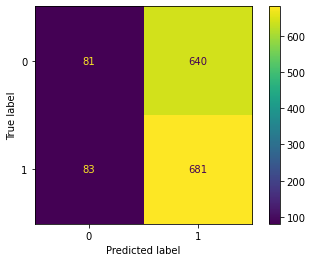

In [133]:
plot_confusion_matrix(pipeline, X_test,y_test)

## Nhận xét
* Độ đo accuracy hoạt động tốt trên tập dữ liệu (100% trên cả train và test)
* Đây là mô hình hoạt đông tốt trên các thuộc tính được rời rạc hoá tốt

## Logistic Regression

In [135]:
df = vnnews_df.copy()

In [136]:
def combine(text):
    return ' '.join(text)

In [137]:
df = df.explode("text")
df["text"] = df.text.apply(combine)
df

,text,domain,label,field
0,thủ tướng abe cúi đầu xin lỗi vì hành động phi thể thao của tuyển nhật,binhluan.biz,1,the_thao
0,sankei sports thủ tướng nhật shinzo abe công khai gửi xin lỗi nhật hoàng toàn bộ dân tinh thần thi đấu phi thể thao đội tuyển nhật world cup 2018 tối qua lượt trận vòng bảng world cup 2018 nhật bản chỉ số phụ senegal đội sau thua colombia,binhluan.biz,1,the_thao
0,nhật vòng chỉ số fairplay thẻ phạt thủ tướng nhật bản shinzo abe cúi đầu xin lỗi tinh thần võ sĩ đạo samurai nhưng đội tuyển nhật bản những hành động tinh thần thượng võ thi đấu world cup chỉ trích bất bình toàn dân hình ảnh kiên cường của dân nhật bản đấu trường quốc tế,binhluan.biz,1,the_thao
0,đứng đầu thành trách nhiệm gửi lời xin lỗi sâu sắc nhân dân abe cúi đầu nhận trách nhiệm người nhật nổi tiếng về tinh thần trách nhiệm và chất võ sĩ đạo,binhluan.biz,1,the_thao
0,đội tuyển áo xanh mệnh danh samurai xanh,binhluan.biz,1,the_thao
...,...,...,...,...
222,rút bài học bổ ích trận thua hà nội,dantri.com.vn,0,the_thao
222,đội chấn chỉnh trận đấu chung kết dĩ nhiên đội tuyển malaysia mong muốn bàn thắng tỷ số trận đấu tới chiếm lợi thế tâm lý sân có theo dõi lại trận đấu ở vòng bảng,dantri.com.vn,0,the_thao
222,thừa nhận mắc phải sai lầm sân,dantri.com.vn,0,the_thao
222,băng hình phá vỡ hàng phòng ngự đối thủ,dantri.com.vn,0,the_thao


In [138]:
X = df.text
y = df.label.values.reshape(-1,1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.42)

In [140]:
X_train.shape, y_train.shape

((2049,), (2049, 1))

In [141]:
vectorizer = TfidfVectorizer()

In [142]:
clf = LogisticRegression(random_state=0)

In [143]:
pipeline = make_pipeline(vectorizer, clf)

In [144]:
pipeline

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [145]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [146]:
pred = pipeline.predict(X_test)

In [148]:
accuracy = accuracy_score(pred, y_test)
accuracy*100

85.72390572390573

In [149]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

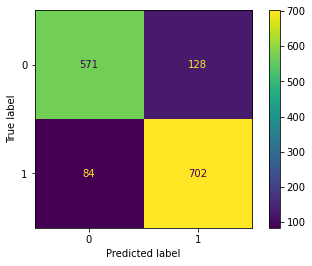

In [150]:
plot_confusion_matrix(pipeline,X_test,y_test)